In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar
from scipy import integrate

In [2]:
from car_park_functions import *

In [3]:
available_parkings = ['Vilanova', 'SantSadurni', 'SantBoi', 'QuatreCamins',
                      'Cerdanyola','Granollers','Martorell','Mollet',
                      'SantQuirze','PratDelLlobregat']
df_column_name=['Parking Vilanova Renfe','Parking Sant Sadurní Renfe','Parking Sant Boi de Llobregat',
              'Parking Quatre Camins','Cerdanyola Universitat Renfe','Parking Granollers Renfe',
                'Parking Martorell FGC','Parking Mollet Renfe','Parking Sant Quirze FGC',
               'Parking Prat del Ll.']
current_parking_ix=1
# problems on Weekend with 2 SantBoi, 4 Cerdanyola, 
# bad data: 6 Martorell, 8 SantQuirze DO NOT USE
#good 0 Vilanova, 1 SantSadurni, 4 QuatreCamins, 5 Granollers, 7 Mollet, 9 PratDelLlobregat 
current_parking = available_parkings[current_parking_ix]
current_column_name=df_column_name[current_parking_ix]
df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df = df.reset_index(drop=True)

# Data processing and preliminary analysis

In [4]:
df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df['Date'] = df['DateTime'].apply(lambda x: x.split(' ')[0])
df['Time'] = df['DateTime'].apply(lambda x: x.split(' ')[1])
df['Free slots'] = df[current_column_name +' plazas totales'].apply(lambda x: int(x.split(',')[0]))
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.sort_values(by="Date")
df['Weekday'] = df.apply(lambda x: getDayName(x['Date']),axis=1)
df['Date'] = [d.date().strftime("%Y-%m-%d") for d in df['Date']]
df = df.drop(['DateTime'], axis=1)
df = df.drop([current_column_name +' plazas totales'], axis=1)

max_value = df["Free slots"].max()
min_value = df["Free slots"].min()
df['Occupancy'] = df['Free slots'].map(lambda x: max_value-x)
axis_ylim = max_value+20
axis_ylim_low = 0


In [5]:
# GLOBAL VARIABLES THAT MUST BE FILLED ALONG THE Jup. NOTEBOOK FOR THE EXPORT
max_capacity = max_value

hist_weekday_proto = []
hist_friday_proto  = []
hist_weekend_proto = []

tn_weekday_pars = []
tn_friday_pars  = []
tn_weekend_pars = []

tn_weekday_proto = []
tn_friday_proto  = []
tn_weekend_proto = []

time = np.linspace(0,23.5,48)

In [6]:
x_date=pd.to_datetime(df['Date']+' '+df['Time'])
y_occ=df['Occupancy']

### Delete days that have not to be taken into account

In [7]:
#only optimized for Vilanova and QuatreCamins

if current_parking == "QuatreCamins":
    days_list = ['2020-01-01', '2020-01-06', '2020-01-18', '2020-01-19', '2020-01-26', '2020-02-07', '2020-02-08', 
                 '2020-02-09', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', 
                 '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', 
                 '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30']
elif current_parking == "Cerdanyola":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11',
                 '2020-01-12', '2020-01-18', '2020-01-19', '2020-01-25', '2020-01-26', 
                 '2020-02-09', '2020-02-24', '2020-02-29', '2020-03-01', '2020-03-09', '2020-03-14', '2020-03-15', 
                 '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Granollers":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',  
                 '2020-01-25', '2020-01-26', '2020-02-02', '2020-02-08', '2020-02-09', '2020-02-22', '2020-02-23', 
                 '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-14', '2020-03-15', '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Mollet": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11', 
                 '2020-01-12', '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif current_parking == "PratDelLlobregat": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-17', 
                 '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                 '2020-01-25', '2020-01-26', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-21', '2020-02-22', 
                 '2020-02-23', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif (current_parking == "Vilanova") | (current_parking == "SantSadurni") :  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-02-08', '2020-02-09', 
                 '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
elif (current_parking == "SantBoi") :  
    days_list = ['2020-01-01', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', 
                 '2020-01-20', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
else:
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-03-16', '2020-03-17', 
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', 
                 '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']

#days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-06', '2020-02-07', '2020-02-23', '2020-02-28', 
#             '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
#             '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-02-29',
#             '2020-01-19']

def checkDataValidty(date):
    if date in days_list: 
        return False
    else:
        return True

In [8]:
from itertools import compress
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

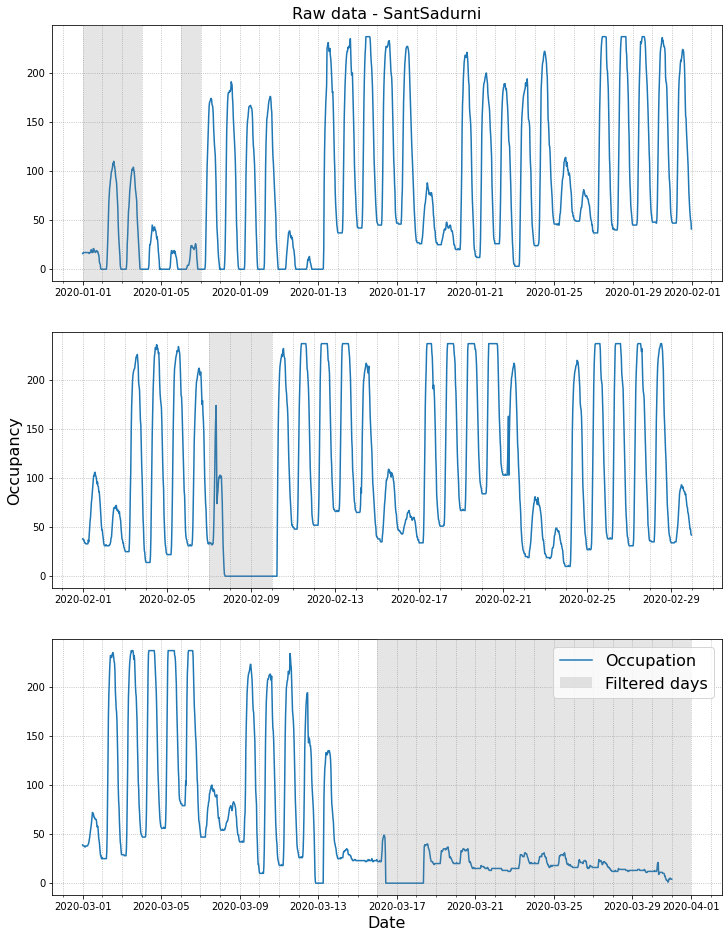

In [9]:
fsize=16
fig, ax = plt.subplots(3,1,figsize=(12,16))

#fig, ax = plt.subplots(1,3)

ax[0].set_title('Raw data - '+current_parking, fontsize=fsize)
#plt.subplot(3,1,1)
indxJan=x_date<pd.to_datetime("2020-02-01")


ax[0].plot(x_date[indxJan],y_occ[indxJan], label='Occupation')
ax[0].grid(which='major',linestyle='dotted')
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].grid(which='minor', linestyle=':')
#ax[0].set_ylabel('Occupancy', fontsize = fsize)

td_days_list=pd.to_datetime(days_list)
index_dates=td_days_list<pd.to_datetime("2020-02-01")

days_list01=list(compress(days_list, index_dates))

for datestr in days_list01:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[0].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)

    
#plt.subplot(3,1,2)
indxFeb=((x_date<pd.to_datetime("2020-03-01")) & (x_date>=pd.to_datetime("2020-02-01")))

ax[1].plot(x_date[indxFeb],y_occ[indxFeb])
ax[1].grid(which='major',linestyle='dotted')
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='minor', linestyle=':')
ax[1].set_ylabel('Occupancy', fontsize = fsize)

index_dates=(td_days_list<pd.to_datetime("2020-03-01")) & (td_days_list>pd.to_datetime("2020-01-31"))
days_list02=list(compress(days_list, index_dates))
for datestr in days_list02:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[1].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)

temp_ticks=ax[1].get_xticks(minor=False)    
ax[1].set_xticks(temp_ticks[:-1], minor=False)    

indxMar=((x_date<pd.to_datetime("2020-04-01")) & (x_date>=pd.to_datetime("2020-03-01")))

ax[2].plot(x_date[indxMar],y_occ[indxMar], label='Occupation');
ax[2].grid(which='major',linestyle='dotted')
ax[2].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[2].grid(which='minor', linestyle=':')
           
index_dates=(td_days_list<pd.to_datetime("2020-04-01")) & (td_days_list>pd.to_datetime("2020-02-29"))
days_list03=list(compress(days_list, index_dates))
bol_once=True
for datestr in days_list03:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[2].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    if bol_once:
        ax[2].legend(fontsize=fsize)
        bol_once=False   
temp_ticks=ax[2].get_xticks(minor=False)    
ax[2].set_xticks(temp_ticks[1:], minor=False); 
ax[2].set_xlabel('Date', fontsize = fsize)
#ax[2].set_ylabel('Occupancy', fontsize = fsize)

fig.savefig('RawData_'+current_parking+'.pdf',bbox_inches='tight')

In [10]:
df['Stable Data'] = df['Date'].apply(lambda x: checkDataValidty(x))
df_holidays = df[df['Stable Data'] == False]
df = df[df["Stable Data"] == True]

## Compute the mean for different days

In [11]:
def toAbsHour(hour):
    beginning = [int(s) for s in hour.split(':')]
    absol_hour = (beginning[0] + beginning[1]/60 )
    return absol_hour

df_byhour = df
df_byhour['ABS_Hour'] = df_byhour['Time'].apply(lambda x: toAbsHour(x) )

df_hours = df_byhour
df_hours['hour'] = df_hours['ABS_Hour'].map(lambda x: (int(2*x))/2)


# Normalization

In [12]:
def Area_by_date(date):
    df_day = df[(df['Date'] == date)]
    Profile = df_day['Occupancy'].values
    Area = integrate.simps(Profile)
    return Area

df_hours['Area'] = df_hours['Date'].apply(lambda x: Area_by_date(x))

def df_normalization(occ, area):
    if area == 0:
        return 'error'
    return occ/area

df_hours['Normalized_occupancy'] = df_hours.apply(lambda x: df_normalization(x.Occupancy, x.Area), axis=1)

#df_hours = df_hours.drop(['Occupancy'], axis=1)
#df_hours['Occupancy'] = df_hours['Normalized_occupancy'].apply(lambda x: x)
df_mean_slots = df_hours.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()

# PREDICTION 

### Prepare the data for the prediction

In [13]:
df_byhour['MonthNumber']= df_byhour['Date'].apply(lambda x: x.split('-')[1])
df_prediction_mean = df_byhour.groupby(by=['Date','hour','MonthNumber','Weekday'], axis = 0, as_index=False).mean()
df_prediction_mean['Profile_2'] = df_prediction_mean['Weekday'].apply(lambda x: classify_2_proto(x))
df_prediction_mean['Profile_3'] = df_prediction_mean['Weekday'].apply(lambda x: classify_3_proto(x))

### Split data in Training/Testing df

In [14]:
number_of_testing_weeks = 3
df_training, df_testing = split_data(df_prediction_mean, number_of_testing_weeks)
df_train_data = df_training
df_train_data.head(5)
df_testing.head()

,Date,hour,MonthNumber,Weekday,Free slots,Occupancy,Stable Data,ABS_Hour,Area,Normalized_occupancy,Profile_2,Profile_3
2256,2020-02-24,0.0,02,Monday,227,10,True,0.0,5413.5,0.001847,Weekday,Weekday
2257,2020-02-24,0.5,02,Monday,227,10,True,0.5,5413.5,0.001847,Weekday,Weekday
2258,2020-02-24,1.0,02,Monday,227,10,True,1.0,5413.5,0.001847,Weekday,Weekday
2259,2020-02-24,1.5,02,Monday,227,10,True,1.5,5413.5,0.001847,Weekday,Weekday
2260,2020-02-24,2.0,02,Monday,227,10,True,2.0,5413.5,0.001847,Weekday,Weekday


## PREDICTION BY MEAN

In [15]:
def mean_day_profile(Profile, df_aux):
    df = df_aux[(df_aux['Profile_2'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_2','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Profile]
    return Day

def mean_of_day(Weekday,date):
    df = df_hours[(df_hours['Weekday'] == Weekday)]
    df_day = df[(df['Date'] == date)]
    df_day_mean = df_day.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Weekday]
    return Day

# Get all days of the type (Monday, Tuesday...) and return the mean of them
def get_days(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

# Get unique dates of the type (Monday, Tuesday...) 
def get_dates(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    dates = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        t_date = data_temp.iloc[i]['Date']
        if len(day) == 48:
            dates.append(t_date)
        
    return dates

def get_days_of_protos(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days


In [16]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)


testing_mondays_dates    = get_dates("Monday", df_testing)
testing_tuesdays_dates   = get_dates("Tuesday", df_testing)
testing_wednesdays_dates = get_dates("Wednesday", df_testing)
testing_thursdays_dates  = get_dates("Thursday", df_testing)
testing_fridays_dates    = get_dates("Friday", df_testing)
testing_saturdays_dates  = get_dates("Saturday", df_testing)
testing_sundays_dates    = get_dates("Sunday", df_testing)

In [17]:
# ------------------------ TESTING DATA -----------------------------

real_monday = mean_of_day('Monday','2020-02-24')
real_tuesday = mean_of_day('Tuesday','2020-02-11')
real_wednesday = mean_of_day('Wednesday','2020-02-26')
real_thursday = mean_of_day('Thursday','2020-02-27')

################## Bad/None data on last Feb week ############################
real_friday = mean_of_day('Friday','2020-03-06') 
real_saturday= mean_of_day('Saturday','2020-03-07')
real_sunday = mean_of_day('Sunday','2020-03-08')

### 3 Prototypes: Weekday, Friday & Weekend

In [18]:
def mean_day_profile_3(Profile, df_aux):
    df = df_aux[(df_aux['Profile_3'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    profile = mean_free_slots[Profile]
    return profile

In [19]:
# Obtain the 3 protoypes. IMPORTANT! We assume all the data in df is valid, robust and correct
def train_statistical_model(df): 
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    return mean_free_slots['Weekday'], mean_free_slots['Friday'], mean_free_slots['Weekend'] 

weekdays = ['Monday', 'Thursday', 'Wednesday', 'Tuesday']
weekend= ['Saturday', 'Sunday']

# Simply return the proper prototype
def predict_full_day_statistical(day): 
    if day in weekdays: 
        return hist_weekday_proto
    elif day in weekend: 
        return hist_weekend_proto
    else:
        return hist_friday_proto


def get_proto_by_day(day_name):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 
    return


def get_scale_factor(current_data, proto):
    index = len(current_data)
    proto_val = proto[index-1]
    last_hour_val = current_data[-1]
    scaling = last_hour_val/proto_val
    return scaling 


def predict_real_time(day, current_hour, current_value, max_capacity, pred_type):
    if pred_type == "Stat":
        proto = get_proto_by_day(day) #Get from statistical prototypes
    else: 
        scale_factor = get_scale_factor(current_value, proto_value)
        prediction = np.array(proto)*scale_factor
    return prediction


In [20]:
hist_weekday_proto, hist_friday_proto, hist_weekend_proto = train_statistical_model(df_train_data)
prediction = predict_full_day_statistical('Monday')

#### Plotting  prototypes

In [21]:
Weekday_proto = mean_day_profile_3('Weekday',df_train_data)
Weekend_proto = mean_day_profile_3('Weekend',df_train_data)
df_fri = df_train_data.drop(df_train_data[df_train_data['Date'] == '2020-02-07' ].index)
Friday_proto = mean_day_profile_3('Friday',df_fri)

#### Computing errors for 3 prototypes

In [22]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_stat = compute_testing_prop_error(testing_mondays, Weekday_proto.values)
error_tuesday_stat = compute_testing_prop_error(testing_tuesdays, Weekday_proto.values)
error_wednesday_stat = compute_testing_prop_error(testing_wednesdays, Weekday_proto.values)
error_thursday_stat = compute_testing_prop_error(testing_thursdays, Weekday_proto.values)
error_friday_stat = compute_testing_prop_error(testing_fridays, Friday_proto.values)
error_saturday_stat = compute_testing_prop_error(testing_saturdays, Weekend_proto.values)
error_sunday_stat = compute_testing_prop_error(testing_sundays, Weekend_proto.values)

## NORMALIZATION

In [23]:
def Area_by_date(date):
    df = df_prediction_mean
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy_mod'].values
    Area = integrate.simps(day_occ)
    return Area


def df_normalization(occ, area):
    if area == 0:
        return occ
    return occ/area

def compute_min(date):
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy'].values
    return min(day_occ)


df_prediction_mean['Min_value'] = df_prediction_mean['Date'].apply(lambda x: compute_min(x))
df_mean_offset = df_prediction_mean.groupby(['Profile_3'], as_index=False).mean() 
df_mean_offset[['Profile_3','Min_value']]

friday_offset = df_mean_offset.iloc[0]['Min_value']
weekday_offset = df_mean_offset.iloc[1]['Min_value']
weekend_offset = df_mean_offset.iloc[2]['Min_value']

df_prediction_mean['Occupancy_mod'] = df_prediction_mean['Occupancy'] - df_prediction_mean['Min_value']

In [24]:
df_prediction_mean['Area'] = df_prediction_mean['Date'].apply(lambda x: Area_by_date(x))
df_prediction_mean['Normalized_occupancy'] = df_prediction_mean.apply(lambda x: df_normalization(x.Occupancy_mod, x.Area), axis=1)
df_normalized = df_prediction_mean[['Date', 'hour','MonthNumber', 'Normalized_occupancy', 'Weekday', 'Profile_3', 'Occupancy_mod', 'Area', 'Occupancy']].copy()

In [25]:
def split_data(df, n_test_weeks, limit_date = None, from_end=True): 
    if(limit_date != None):
        init_test = df[df['Date']==limit_date].index[0];
        end_test = df.shape[0]
        test_domain = range(init_test, end_test)
        test_domain = list(test_domain)

    else:
        if(from_end == True):
            end_test = df.shape[0]
            week_domain = n_test_weeks*336
            init_test = end_test-week_domain
            test_domain = range(init_test, end_test)
            test_domain = list(test_domain)
            
        elif(from_end == False):
            week_domain = n_test_weeks*336
            init_test = 0
            end_test = week_domain
            test_domain = range(0,week_domain)
            test_domain = list(test_domain)
            
    test_df = df[init_test:end_test]
    training_df = df.drop(test_domain)
    return training_df, test_df

In [26]:
df_training, df_testing = split_data(df_normalized, 3)

In [27]:
#pd.set_option('display.max_rows', None)
#df_testing.sort_values(by='Area', ascending=True)

In [28]:
#pd.set_option('display.max_rows', 5)

In [29]:
df_training['Area'] = df_training['Date'].apply(lambda x: Area_by_date(x))
df_training

df_mean_areas = df_training.groupby(['Profile_3'], as_index=False).mean() 
df_mean_areas[['Profile_3', 'Area']]

friday_area = df_mean_areas.iloc[0]['Area']
weekday_area = df_mean_areas.iloc[1]['Area']
weekend_area = df_mean_areas.iloc[2]['Area']

print('Weekday area: ' , weekday_area)
print('Friday area: ' , friday_area)
print('Weekend area: ' , weekend_area)

# df_normalized

Weekday area:  4565.0462962963165
Friday area:  4289.652777777784
Weekend area:  956.5059523809538


In [30]:
def get_days_normalized(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
    return days

def get_days_of_protos_normalized(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

In [31]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays_norm    = get_days_normalized("Monday", df_testing)
testing_tuesdays_norm   = get_days_normalized("Tuesday", df_testing)
testing_wednesdays_norm = get_days_normalized("Wednesday", df_testing)
testing_thursdays_norm  = get_days_normalized("Thursday", df_testing)
testing_fridays_norm    = get_days_normalized("Friday", df_testing)
testing_saturdays_norm  = get_days_normalized("Saturday", df_testing)
testing_sundays_norm    = get_days_normalized("Sunday", df_testing)

testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)

In [32]:
training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
# for ii in range(len(training_weekdays_norm)):
#     plt.plot(time,training_weekdays_norm[ii])

## MATHEMATICAL MODEL - CDF Subtraction

In [33]:
# ********************************************** WEEKDAY *************************************************************
#from scipy.special import tna, factorial
from scipy.optimize import minimize



training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]

parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_weekdaytn = minimize(model_tn_areaN, parameters_tn, args=(training_weekdays_norm), method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})

errors = np.ones(np.shape(training_weekdays_norm))
optimal_params_weekdaytn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekdays_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})



Optimization terminated successfully.
         Current function value: 0.005698
         Iterations: 175
         Function evaluations: 293


In [34]:
import math 
var_weekdaytn_time = np.mean(errors)
stdv_weekdaytn=math.sqrt(var_weekdaytn_time)
print('global stdv %.5f\n' % stdv_weekdaytn)
stdv_weekday30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_weekday30mins:
    print('\t' + str(i))

global stdv 0.00210

stdv per time-step
	0.0010466869420446114
	0.0010125257571285034
	0.0010001634102430174
	0.0009965492231907552
	0.000995724246851154
	0.0010071414435682815
	0.0010059751985091135
	0.0009884469387139753
	0.000970721679117963
	0.0009594161482678929
	0.001264138618055163
	0.0018246935772737848
	0.0024824172696484865
	0.0023619611919905347
	0.0021496909538497003
	0.0026706080996588564
	0.0022942581044445316
	0.0025722095706978043
	0.0025054222652573224
	0.0023437730055319845
	0.0021608586048828707
	0.0019869636451355544
	0.002201722901854772
	0.0023127111472771283
	0.0023574156476429877
	0.002351786692120703
	0.0024372152843990707
	0.002500493350816245
	0.002300457123541206
	0.0023700854470446054
	0.002326741411262001
	0.001892370650520835
	0.001912362725907158
	0.0024655251133064034
	0.001830908266195829
	0.0017922699376626433
	0.002219992151559655
	0.002128086148968068
	0.0019990771603438443
	0.002526356917495042
	0.002501593209772919
	0.0024246733083076294
	0.002328

In [35]:
def plot_model_tn(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1):
    fsize=16
    time2 = np.linspace(0,23.5,48)
    time_tn=time2/24
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de


    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    fig, ax = plt.subplots(2,figsize=(18,10))
    ax[0].plot(time, pdf_ar/sum(pdf_ar) , '-b',label='pdf TN arrival')
    ax[0].plot(time, pdf_de/sum(pdf_de), '-r',label='pdf TN departure')
    ax[0].set_title('pdfs', fontsize=fsize)
    ax[0].legend(fontsize=fsize, loc="upper right");
    ax[0].set_ylabel('probability', fontsize = fsize)
    ax[0].grid(which='major',linestyle='dotted')
    ax[0].set_xlim([0,23.5])
    
    ax[1].plot(time, cdf_ar , '--b',label='cdf TN arrival')
    ax[1].plot(time, cdf_de, '--r',label='cdf TN departure')
    ax[1].plot(time, cdf_ar-cdf_de, 'r',label='model (arrival-departure)')
    ax[1].set_title('cdfs', fontsize=fsize)
    ax[1].legend(fontsize=fsize, loc="upper left")
    ax[1].grid(which='major',linestyle='dotted')
    ax[1].set_xlim([0,23.5])
    ax[1].set_xlabel('hour', fontsize = fsize)
    ax[1].set_ylabel('porp. of cars', fontsize = fsize)
    fig.savefig('Model_'+current_parking+'.pdf',bbox_inches='tight');

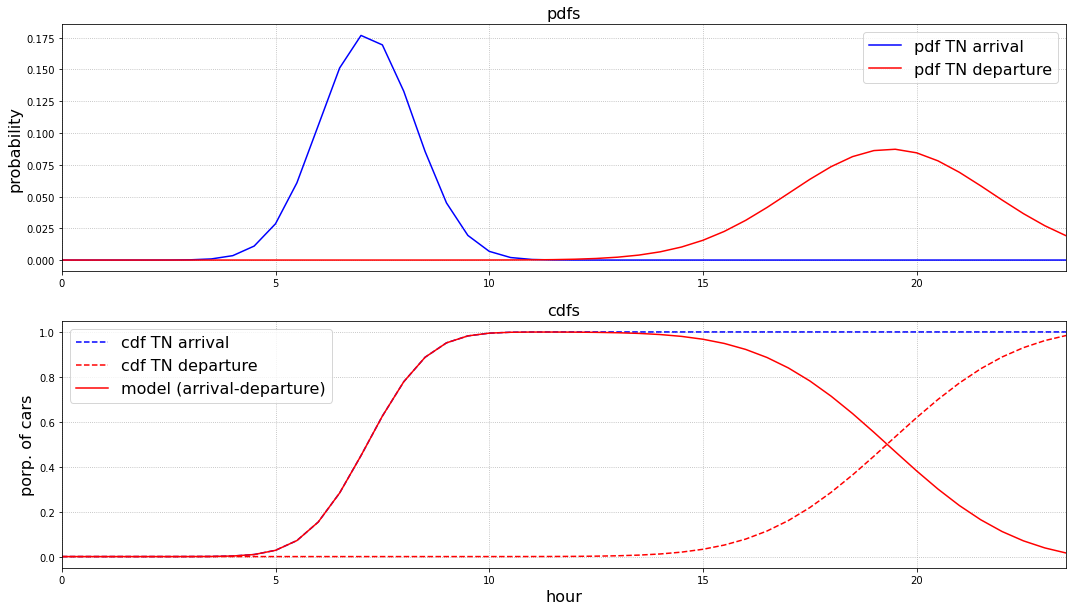

In [36]:
plot_model_tn(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],optimal_params_weekdaytn.x[3])

In [37]:
weekday_math_params = optimal_params_weekdaytn.x
weekday_math_params

array([0.29758856, 0.04664731, 0.80764371, 0.09835124])

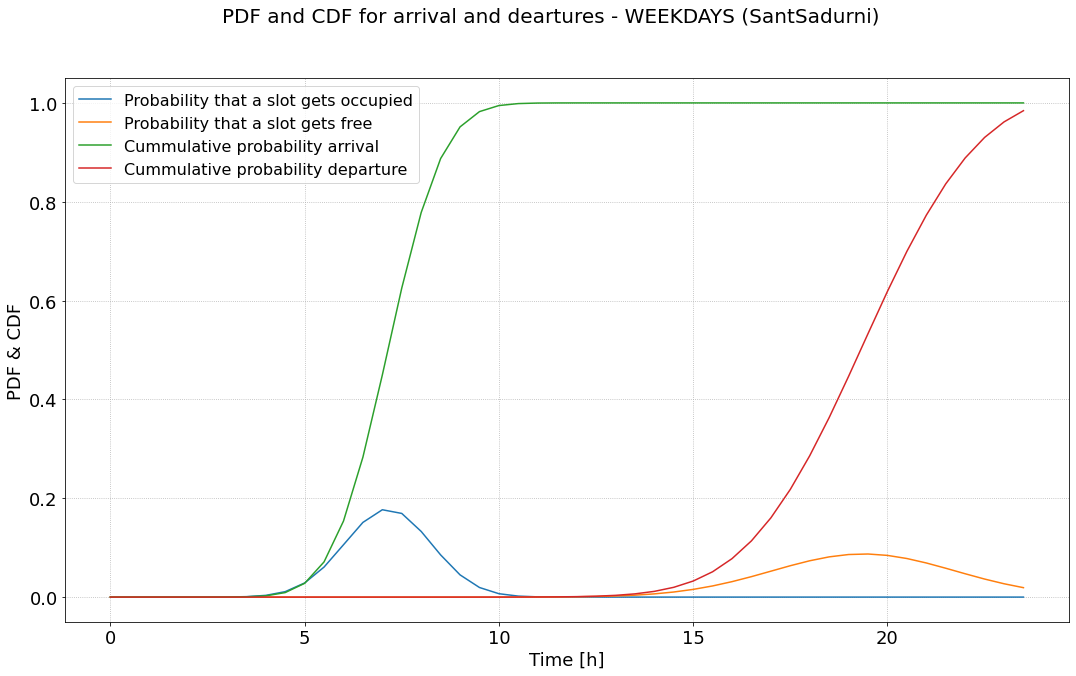

In [38]:
time2 = np.linspace(0,23.5,48)
time_tn=time2/24
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#tn1_wd = gam(time2, optimal_params_weekday.x[0], optimal_params_weekday.x[1])
#tn2_wd = gam(time2, optimal_params_weekday.x[2], optimal_params_weekday.x[3])

#cdf1_wd_ap = generate_cdf(tn1_wd)
#cdf2_wd_ap = generate_cdf(tn2_wd)
cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");


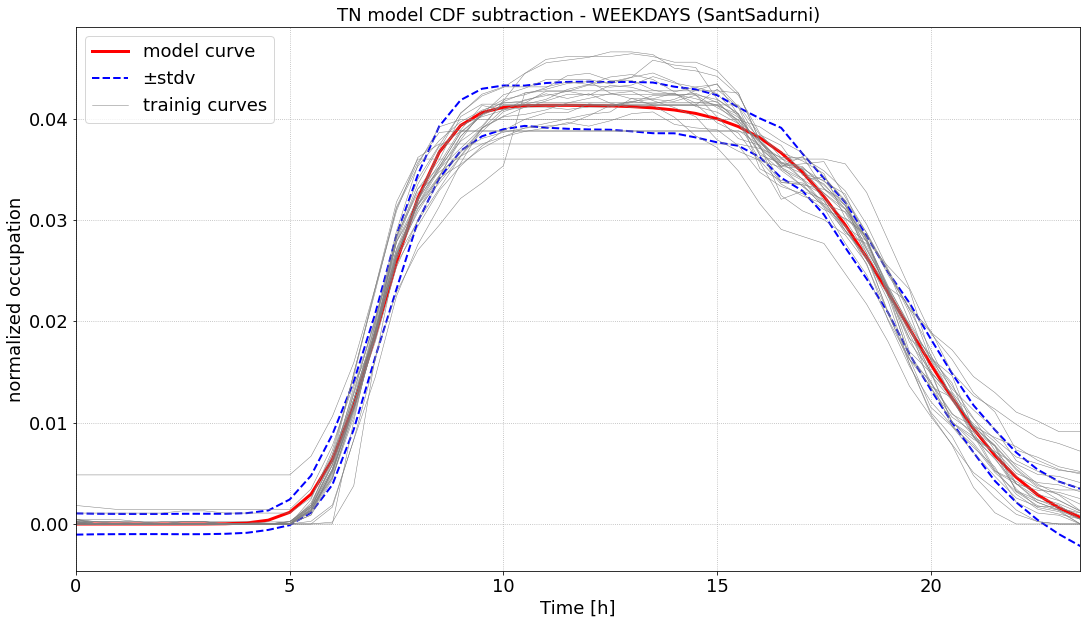

In [39]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - WEEKDAYS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_weekday-stdv_weekday30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_weekday, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_weekday+stdv_weekday30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")
#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_weekdays_norm)):
    if i==0:
        plt.plot(time, training_weekdays_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_weekdays_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'.pdf',bbox_inches='tight');
fig.savefig('Training_'+current_parking+'.png',bbox_inches='tight');

### FRIDAYS

In [40]:
parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_fridaytn = minimize(model_tn_areaN, parameters_tn, args=(training_fridays_norm), method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})

errors = np.ones(np.shape(training_fridays_norm))
optimal_params_fridaytn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_fridays_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})


Optimization terminated successfully.
         Current function value: 0.005326
         Iterations: 178
         Function evaluations: 301


In [41]:
var_fridaytn = np.mean(errors)
stdv_fridaytn=math.sqrt(var_fridaytn)
print('global stdv %.5f\n' % stdv_fridaytn)
stdv_friday30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_friday30mins:
    print('\t' + str(i))

global stdv 0.00430

stdv per time-step
	0.007054481189676397
	0.0069268644644129036
	0.006872094992254786
	0.0068289918237894225
	0.006725682019475363
	0.00657820265626098
	0.0064120164709053785
	0.005983786170029728
	0.005567954080573436
	0.0052784700747089686
	0.005606358763351841
	0.00675420281758873
	0.0071101024806615835
	0.006735693875583519
	0.0038151372696535535
	0.0028390191383432955
	0.0037952734546409976
	0.0033666040586167838
	0.002925177678799336
	0.0029357439608935264
	0.003168410120536048
	0.003719306026877246
	0.0038302946701174382
	0.0036652842415061835
	0.003403976254490397
	0.0031922748151794775
	0.0030463122822651277
	0.00321342169549267
	0.0033826676483981687
	0.00324238431334392
	0.0035938621137122572
	0.002713509657467581
	0.002528143904440262
	0.0036347805601168602
	0.0034182368302763445
	0.0027790894366967072
	0.0027810520960047415
	0.0023041116800293854
	0.00223299870941297
	0.0025345110046930677
	0.0019115713119146653
	0.0019434173340981899
	0.00229759947711

In [42]:
optimal_params_fridaytn

 final_simplex: (array([[0.30300615, 0.08636977, 0.75832976, 0.14391667],
       [0.30300628, 0.08636986, 0.75833013, 0.14391723],
       [0.30300614, 0.08636993, 0.75832983, 0.14391614],
       [0.303006  , 0.08636905, 0.75833016, 0.14391574],
       [0.30300669, 0.08637001, 0.75832962, 0.1439176 ]]), array([0.00532616, 0.00532616, 0.00532616, 0.00532616, 0.00532616]))
           fun: 0.005326164890280228
       message: 'Optimization terminated successfully.'
          nfev: 301
           nit: 178
        status: 0
       success: True
             x: array([0.30300615, 0.08636977, 0.75832976, 0.14391667])

In [43]:
#optimal_params_friday.x
#friday_math_params = optimal_params_friday.x
friday_math_params = optimal_params_fridaytn.x

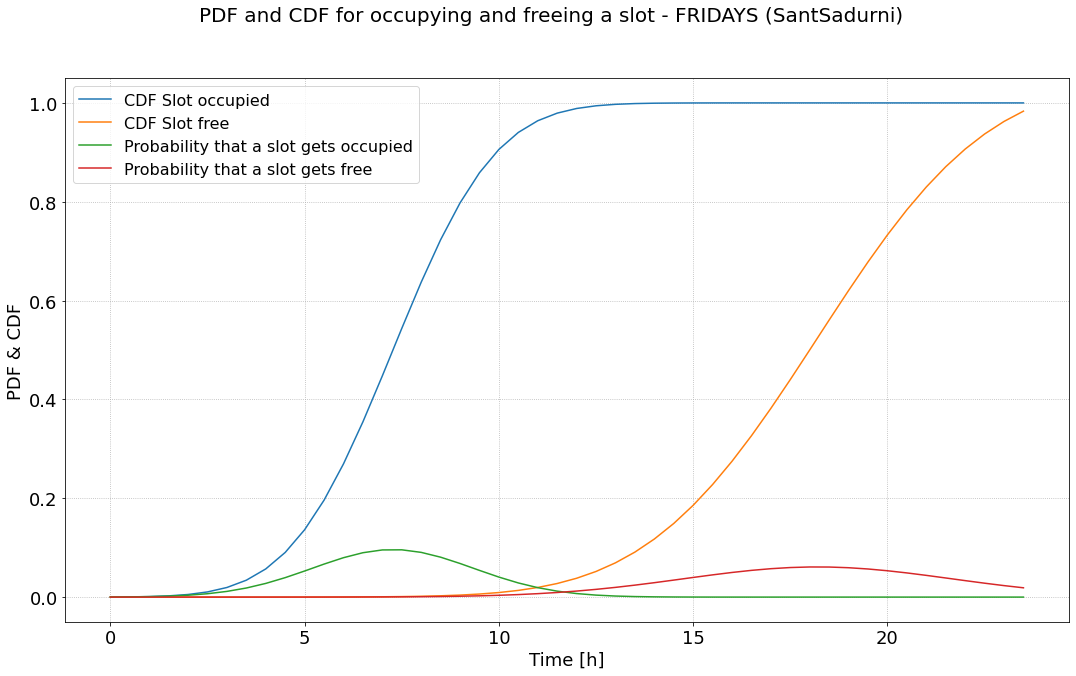

In [44]:

#tn1_fri = gam(time, optimal_params_friday.x[0], optimal_params_friday.x[1])
#tn2_fri = gam(time, optimal_params_friday.x[2], optimal_params_friday.x[3])
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
cdf1_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
cdf2_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

resta = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta/sum(resta)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_fri, label="CDF Slot occupied")
plt.plot(time, cdf2_fri, label="CDF Slot free")
plt.plot(time, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

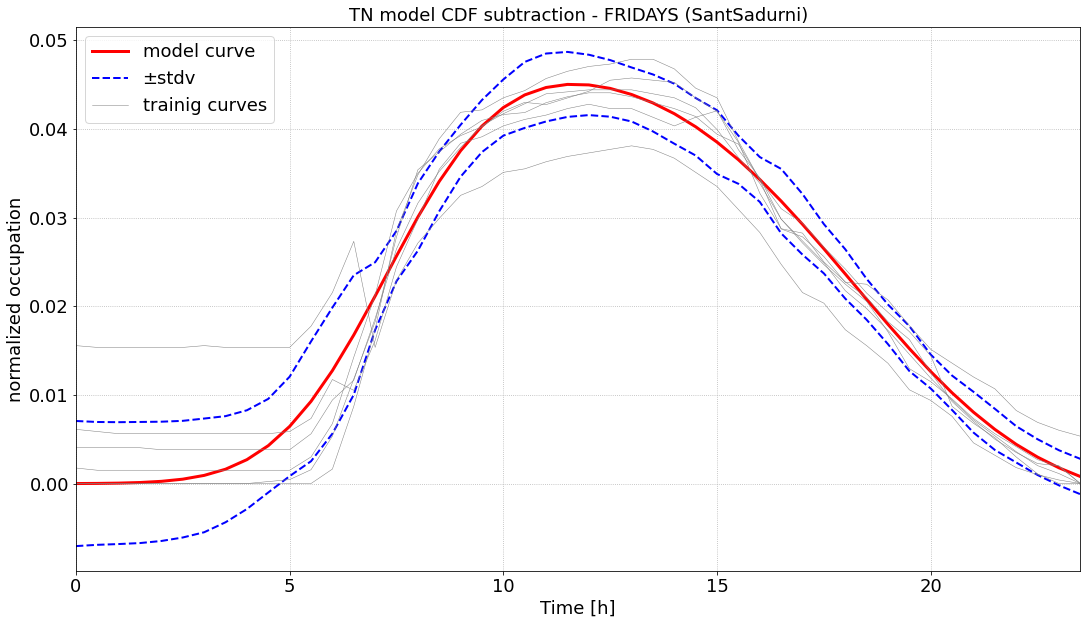

In [71]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - FRIDAYS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_friday-stdv_friday30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_friday, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_friday+stdv_friday30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")

#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_fridays_norm)):
    if i==0:
        plt.plot(time, training_fridays_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_fridays_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'_FRIDAY.pdf',bbox_inches='tight');

### WEEKENDS

In [46]:
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]
t = []
for i in range(0,len(training_weekends_norm)):
    if training_weekends_norm[i].mean() != 0:
        t.append(training_weekends_norm[i])
        
training_weekends_norm = t


errors = np.ones(np.shape(training_weekends_norm))    
if ((current_parking == "SantBoi") or (current_parking == "Cerdanyola")): 
    #optimal_params_weekendtn = minimize(model_tn_areaN_args, parameters_tn, args=(training_weekends_norm), method='SLSQP',
    #                                   bounds=((0, None), (0, None),(0, None),(0, None)),
    #                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})
    optimal_params_weekendtn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekends_norm, errors),
                                    method='SLSQP',
                                    bounds=((0, None), (0, None),(0, None),(0, None)),
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})
else:
    #optimal_params_weekendtn = minimize(model_tn_areaN_args, parameters_tn, args=(training_weekends_norm), method='Nelder-Mead',
    #                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})     
    
    optimal_params_weekendtn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekends_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})


Optimization terminated successfully.
         Current function value: 0.076566
         Iterations: 176
         Function evaluations: 295


In [47]:
var_weekendtn = np.mean(errors)
stdv_weekendtn=math.sqrt(var_weekendtn)
print('global stdv %.5f\n' % stdv_weekendtn)
stdv_weekend30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_weekend30mins:
    print('\t' + str(i))

global stdv 0.01108

stdv per time-step
	0.006790254856649883
	0.005790654739827461
	0.005702822262327515
	0.005328022630767715
	0.004977224955237402
	0.004851106383858325
	0.004598790498853636
	0.004287070894591151
	0.004246972333035929
	0.003975061940741001
	0.003879307951413442
	0.0037250110289477703
	0.0037468871020744482
	0.00443645288626324
	0.005251225811344973
	0.006212207756293762
	0.0073781007593802655
	0.008362833187329274
	0.009385630361544016
	0.008595245227729795
	0.009465615433062728
	0.012884132788243567
	0.021222487865667456
	0.016687967594774495
	0.02124255998473777
	0.024071085846928138
	0.026518231684500914
	0.017972582278720516
	0.011688943645692874
	0.010784406809516806
	0.009752804378597043
	0.012518272384455869
	0.015796827910002555
	0.013999256683425233
	0.014341995258589977
	0.012288396965016433
	0.011425369737358144
	0.010714188569189455
	0.010282474222548594
	0.01062059392485619
	0.010235227342254878
	0.009726896313851107
	0.00817393106504891
	0.006678363302

In [48]:
weekend_math_params = optimal_params_weekendtn.x
optimal_params_weekendtn.x

array([0.40900653, 0.08197453, 0.81404647, 0.19898443])

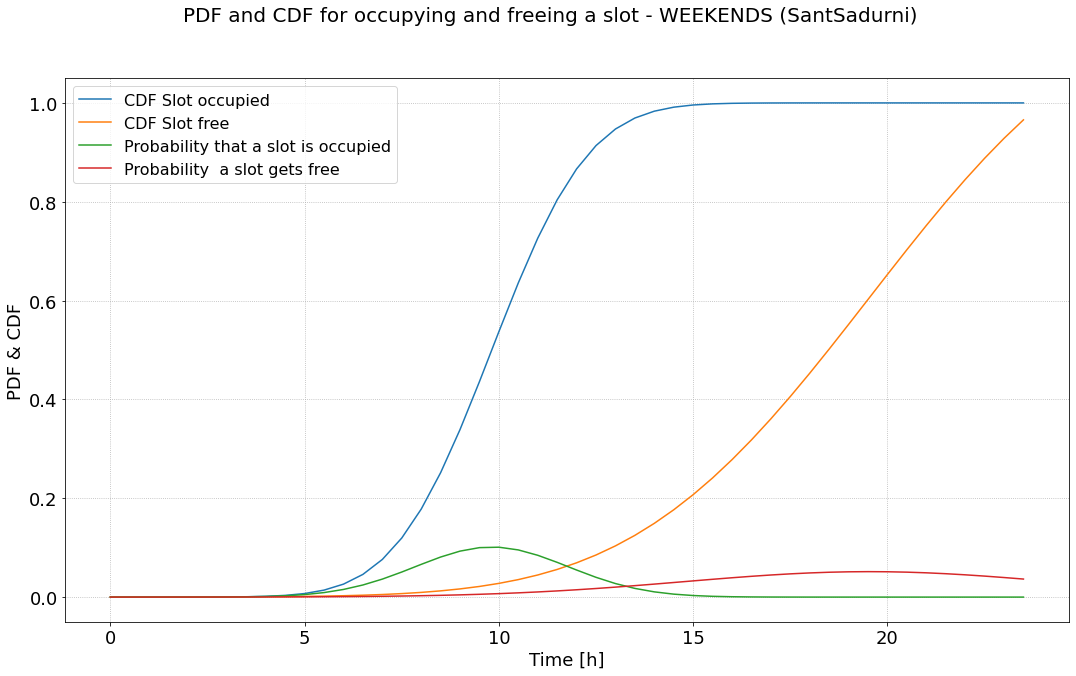

In [49]:
#tn1_we = gam(time, optimal_params_weekend.x[0], optimal_params_weekend.x[1])
#tn2_we = gam(time, optimal_params_weekend.x[2], optimal_params_weekend.x[3])
tn1_we=tn(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
tn2_we=tn(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



#cdf1_we = generate_cdf(tn1_we)
#cdf2_we = generate_cdf(tn2_we)
cdf1_we = tn_cdf(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
cdf2_we = tn_cdf(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



resta_we = np.array(cdf1_we) - np.array(cdf2_we)
prototype_math_weekend = resta_we/sum(resta_we)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - WEEKENDS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_we, label="CDF Slot occupied")
plt.plot(time, cdf2_we, label="CDF Slot free")
plt.plot(time, tn1_we/sum(tn1_we), label="Probability that a slot is occupied")
plt.plot(time, tn2_we/sum(tn2_we),  label="Probability  a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

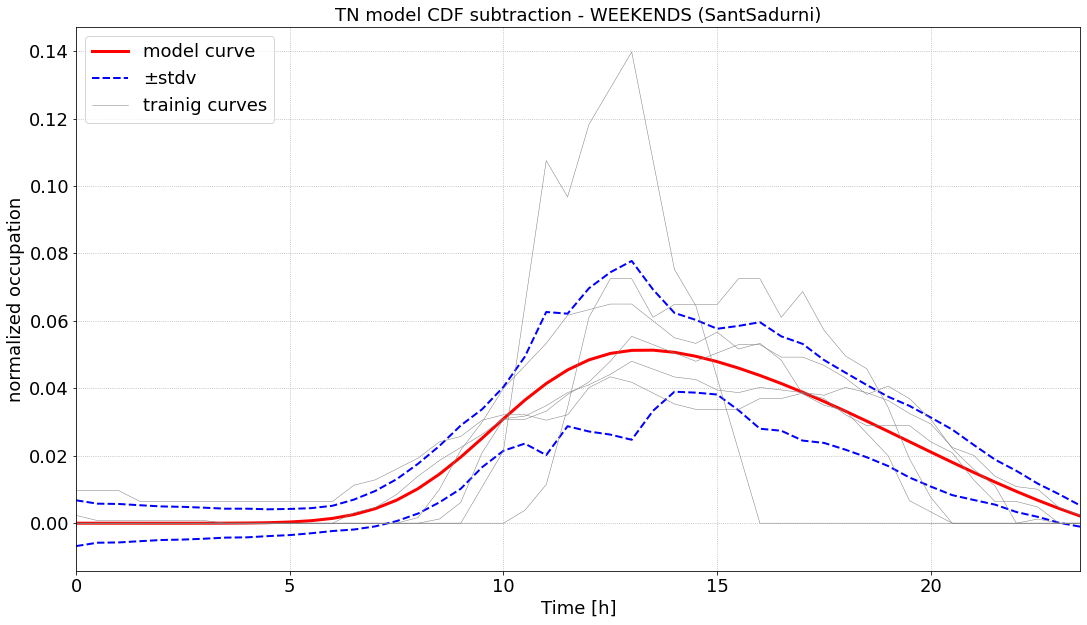

In [50]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - WEEKENDS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_weekend-stdv_weekend30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_weekend, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_weekend+stdv_weekend30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")

for i in range(0,len(training_fridays_norm)):
    if i==0:
        plt.plot(time, training_weekends_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_weekends_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'WEEKEND.pdf',bbox_inches='tight');

In [51]:
printTimes(optimal_params_weekdaytn.x,current_parking,'WEEKDAYS')
printTimes(optimal_params_fridaytn.x,current_parking,'FRIDAYS')
printTimes(optimal_params_weekendtn.x,current_parking,'WEEKENDS')

--------- WEEKDAYS SantSadurni -----------
Mean Arrival Time   = 07:08h
stdv Arrival        =  1:07h
Mean Departure Time = 19:23h
stdv Departure      =  2:21h
--------- FRIDAYS SantSadurni -----------
Mean Arrival Time   = 07:16h
stdv Arrival        =  2:04h
Mean Departure Time = 18:11h
stdv Departure      =  3:27h
--------- WEEKENDS SantSadurni -----------
Mean Arrival Time   = 09:48h
stdv Arrival        =  1:58h
Mean Departure Time = 19:32h
stdv Departure      =  4:46h


In [52]:
tn_weekday_n = prototype_math_weekday
tn_friday_n = prototype_math_friday
tn1_weekend_n = prototype_math_weekend

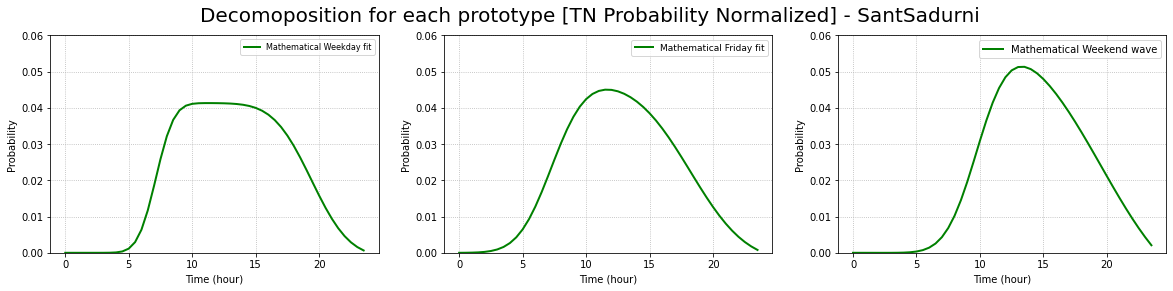

In [53]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time2, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,0.06])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time2, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,0.06])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time2, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,0.06])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

In [54]:
#**************************************WEEKDAY************************************
tn_weekday = tn_weekday_n*weekday_area + weekday_offset

#**************************************FRIDAY************************************
tn_friday = tn_friday_n*friday_area + friday_offset

#**************************************WEEKEND************************************
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 

### Comparing normalized mathematical fitted prototype with testing data

In [55]:
def subplot_training(fig, ax, xx, yy, proto_data, test_days, day, proto_name): 
    ax[xx,yy].plot(time, proto_data, linewidth=3, linestyle='dashed', label= proto_name + ' TN prediction')
    for i in range(0, len(test_days)): 
        ax[xx, yy].plot(time, test_days[i], linewidth=1, label='Testing ' + day )
        if i==0:
            ax[xx,yy].legend(fontsize=16)
    ax[xx,yy].grid(linestyle='dotted')
    ax[xx,yy].set_ylim(-2,axis_ylim)
    ax[xx,yy].set_xlabel('Time (hours)', fontsize=16)
    ax[xx,yy].set_ylabel('Occupancy', fontsize=16)


### Denormalization / Rescaling

In [56]:

tn_weekday = tn_weekday_n*weekday_area + weekday_offset
tn_friday = tn_friday_n*friday_area + friday_offset
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 



______MEAN________
4.453708645743659
5.5583380566575356
6.573576382115566
12.105627130354774
13.209192052686213
8.849283072606532
6.703623147555973
______STDV________
1.409378477060355
1.726605293416584
1.9137767922613946
5.717318510118883
4.085782289934299
3.105028411281766
1.3323089930335004


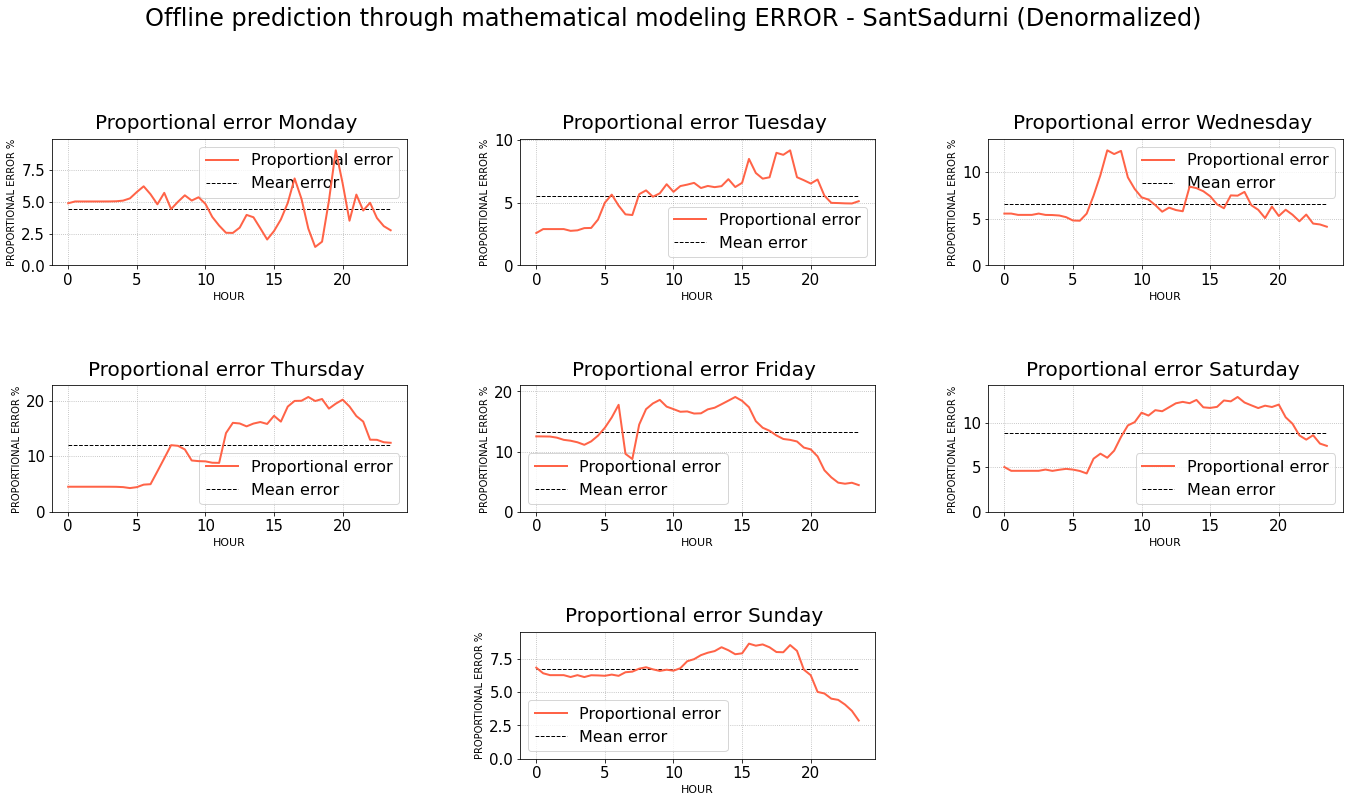

In [57]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_tn = compute_testing_prop_error(testing_mondays, tn_weekday)
error_tuesday_tn = compute_testing_prop_error(testing_tuesdays, tn_weekday)
error_wednesday_tn = compute_testing_prop_error(testing_wednesdays, tn_weekday)
error_thursday_tn = compute_testing_prop_error(testing_thursdays, tn_weekday)
error_friday_tn = compute_testing_prop_error(testing_fridays, tn_friday)
error_saturday_tn = compute_testing_prop_error(testing_saturdays, tn1_weekend)
error_sunday_tn = compute_testing_prop_error(testing_sundays, tn1_weekend)

def subplotCDFsubtractionErr(fig, ax, axx, axy, x, error, mean, title, day ):
    ax[axx,axy].plot(x, error, color="tomato", linewidth=2, zorder=10, label='Proportional error')
    ax[axx,axy].plot(x, mean, linewidth=1, linestyle='--' ,color='black', label='Mean error')
    ax[axx,axy].grid(linestyle='dotted')
    ax[axx,axy].set_ylabel('Proportional error %', fontsize=20)
    ax[axx,axy].set_xlabel('Hours', fontsize=20)
    ax[axx,axy].set_title(title , fontsize=20, pad=10)
    ax[axx,axy].set_ylim((0,1.1*max(error)))
    ax[axx,axy].legend(fontsize=16)
    ax[axx,axy].tick_params( labelsize=15)

    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through mathematical modeling ERROR - '+current_parking+' (Denormalized)', fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 0, time, error_monday_tn, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 1, time, error_tuesday_tn, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 2, time, error_wednesday_tn, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 0, time, error_thursday_tn, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 1, time, error_friday_tn, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 2, time, error_saturday_tn, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 2, 1, time, error_sunday_tn, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)


print('______MEAN________')    

print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_tn))
print(np.std(error_tuesday_tn))
print(np.std(error_wednesday_tn))
print(np.std(error_thursday_tn))
print(np.std(error_friday_tn))
print(np.std(error_saturday_tn))
print(np.std(error_sunday_tn))


### MATHEMATICAL PROTOTYE: Real time prediction by SCALING

In [58]:
# Plotting methods to reduce cell dimension

def real_timing_predition(fig, ax, axx, day, tn_proto, real_day, scaled_proto, Prototype, limit_hour, t_date):
    fig.suptitle('Real time prediction Scaling mathematical and mean proto for Testing '
                 + day + ' ' +t_date + ' ('+ current_parking+')', fontsize='18')
    ax[axx].plot(time, real_day.values, linestyle='dashdot', linewidth=2, label='Real ' + day)
    ax[axx].plot(time, tn_proto,'--',color='grey', label='TN prototype (not scaled)')
    ax[axx].plot(time, scaled_proto, color='green', linewidth=2, label='TN proto (scaled)')
    ax[axx].plot(time, Prototype, color='orange', linewidth=2, label='Stat. scaled proto')
    ax[axx].axvline(x=limit_hour, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour, facecolor='grey', alpha=0.2, label='Known Activity')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].legend(fontsize=9)
    ax[axx].set_ylim([0,1.1*max([max(real_day.values),max(tn_proto),max(scaled_proto),max(Prototype)])])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Occupancy', fontsize=14)

def errors_plotting(fig, ax, axx, scaled_proto, Prototype, real_day, day, limit_hour):
    #Computing Errors
    limit_hour = limit_hour*2
    tn_scaled_error = (np.absolute((np.array(scaled_proto) - np.array(real_day.values)))/max_value)*100
    mean_scaled_error = (np.absolute((np.array(Prototype) - np.array(real_day.values)))/max_value)*100

    tn_s_error_mean = [np.mean(tn_scaled_error[limit_hour:])]*len(tn_scaled_error)
    mean_s_error_mean = [np.mean(mean_scaled_error[limit_hour:])]*len(mean_scaled_error)

    #Second plot
#     time = time[limit_hour:]
    ax[axx].plot(time[limit_hour:], tn_scaled_error[limit_hour:], color='tomato', label='TN scaling error')
    ax[axx].plot(time[limit_hour:],tn_s_error_mean[limit_hour:], '--',color='tomato', label='TN Mean prop. error')
    ax[axx].plot(time[limit_hour:],mean_scaled_error[limit_hour:], color='blueviolet', label='Proto scaling error')
    ax[axx].plot(time[limit_hour:],mean_s_error_mean[limit_hour:], '--',color='blueviolet', label='Proto. Mean prop. error')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].axvline(x=limit_hour/2, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour/2, facecolor='grey', alpha=0.2, label='Known Activity', zorder=4)
    ax[axx].legend(fontsize=12)
    ax[axx].set_ylim([0,1.1*max(max(tn_scaled_error[limit_hour:]),max(mean_scaled_error[limit_hour:]))])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Proportional error (%)', fontsize=14)

    print('Real ' + day + ' scaled prtotype error: ', round(100*mean_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled prtotype STDV: ', np.std(mean_scaled_error[limit_hour:]))

    print('Real ' + day + ' scaled TN error: ', round(100*tn_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled TN STDV: ', np.std(tn_scaled_error[limit_hour:]))
    print('_____________________________________________________________')

def get_scaling_factor(limit_hour, test_day, proto):
    if limit_hour < 6:
        return 1
    index = limit_hour*2
    current_real_data = test_day.values[index]
    proto_value = proto[index]
    scaling = current_real_data/proto_value
    return scaling

#### MONDAY

2020-02-24
Real Monday scaled prtotype error:  3.13 %
Real Monday scaled prtotype STDV:  1.8143475419751849
Real Monday scaled TN error:  2.41 %
Real Monday scaled TN STDV:  1.878594052751636
_____________________________________________________________
2020-03-02
Real Monday scaled prtotype error:  3.25 %
Real Monday scaled prtotype STDV:  1.7856227393282116
Real Monday scaled TN error:  2.03 %
Real Monday scaled TN STDV:  1.7277582509976595
_____________________________________________________________
2020-03-09
Real Monday scaled prtotype error:  3.97 %
Real Monday scaled prtotype STDV:  3.741770719714768
Real Monday scaled TN error:  3.52 %
Real Monday scaled TN STDV:  2.42369724170683
_____________________________________________________________


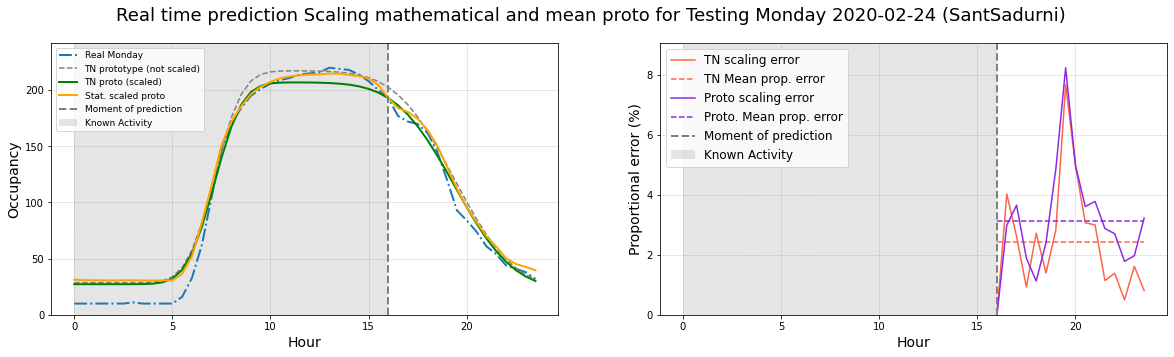

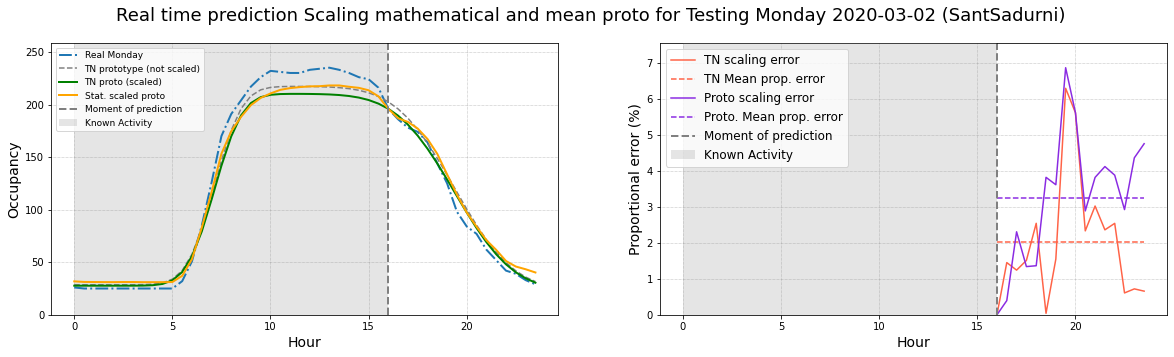

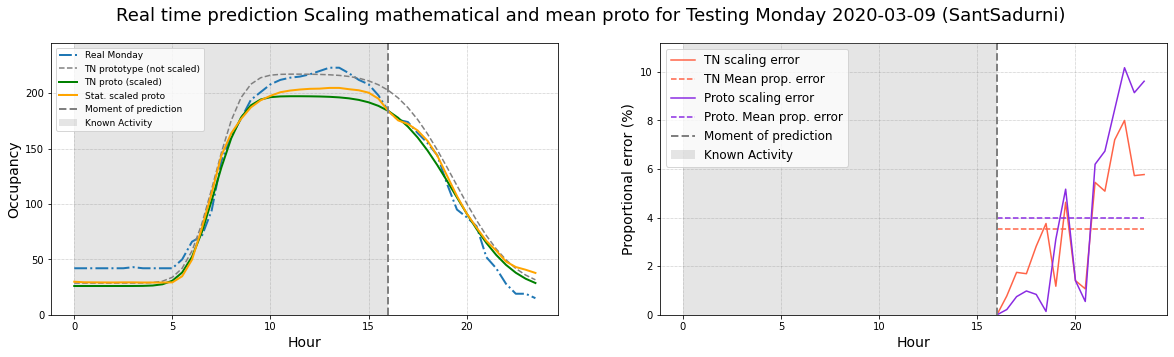

In [59]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_mondays
t_dates=testing_mondays_dates
limit_hour = 16
day = 'Monday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

#### TUESDAY

2020-02-25
Real Tuesday scaled prtotype error:  2.85 %
Real Tuesday scaled prtotype STDV:  1.050121310420595
Real Tuesday scaled TN error:  1.43 %
Real Tuesday scaled TN STDV:  1.4424279292089455
_____________________________________________________________
2020-03-03
Real Tuesday scaled prtotype error:  1.23 %
Real Tuesday scaled prtotype STDV:  1.044494147693502
Real Tuesday scaled TN error:  2.8 %
Real Tuesday scaled TN STDV:  1.7897768986116132
_____________________________________________________________
2020-03-10
Real Tuesday scaled prtotype error:  7.17 %
Real Tuesday scaled prtotype STDV:  5.391738450925587
Real Tuesday scaled TN error:  6.38 %
Real Tuesday scaled TN STDV:  4.893125542325315
_____________________________________________________________


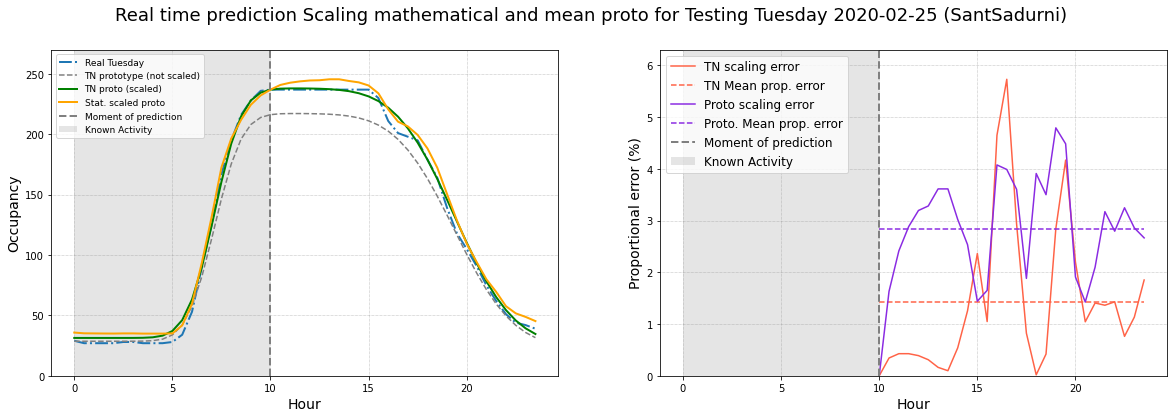

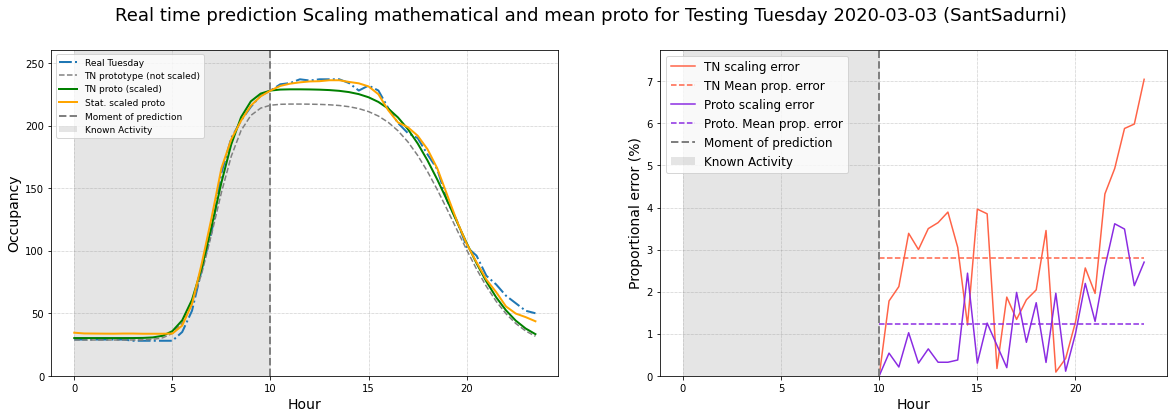

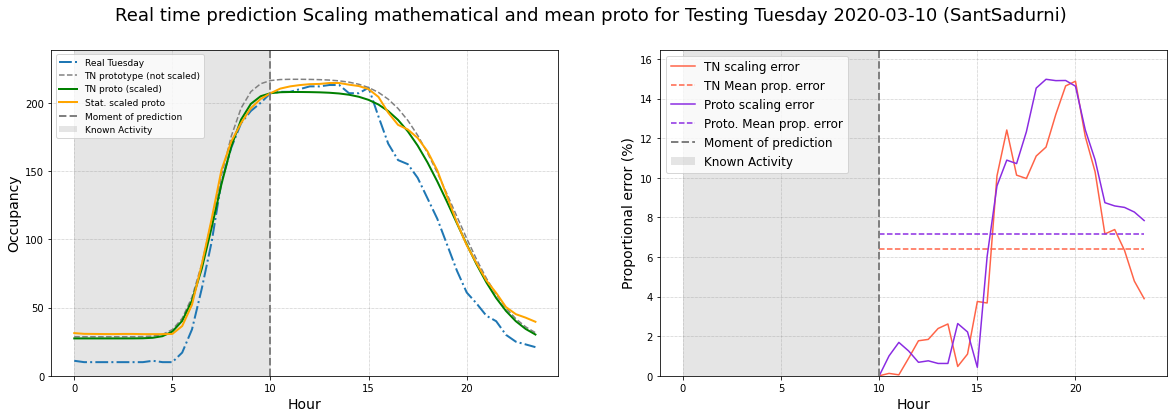

In [60]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_tuesdays
t_dates= testing_tuesdays_dates
limit_hour = 10
day = 'Tuesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### WEDNESDAY

2020-02-26
Real Wednesday scaled prtotype error:  3.26 %
Real Wednesday scaled prtotype STDV:  2.3083086192883115
Real Wednesday scaled TN error:  3.42 %
Real Wednesday scaled TN STDV:  2.742483836466186
_____________________________________________________________
2020-03-04
Real Wednesday scaled prtotype error:  4.76 %
Real Wednesday scaled prtotype STDV:  2.4915847961345015
Real Wednesday scaled TN error:  4.68 %
Real Wednesday scaled TN STDV:  2.753830320802336
_____________________________________________________________
2020-03-11
Real Wednesday scaled prtotype error:  4.02 %
Real Wednesday scaled prtotype STDV:  1.699294659630861
Real Wednesday scaled TN error:  4.2 %
Real Wednesday scaled TN STDV:  2.3332573772438447
_____________________________________________________________


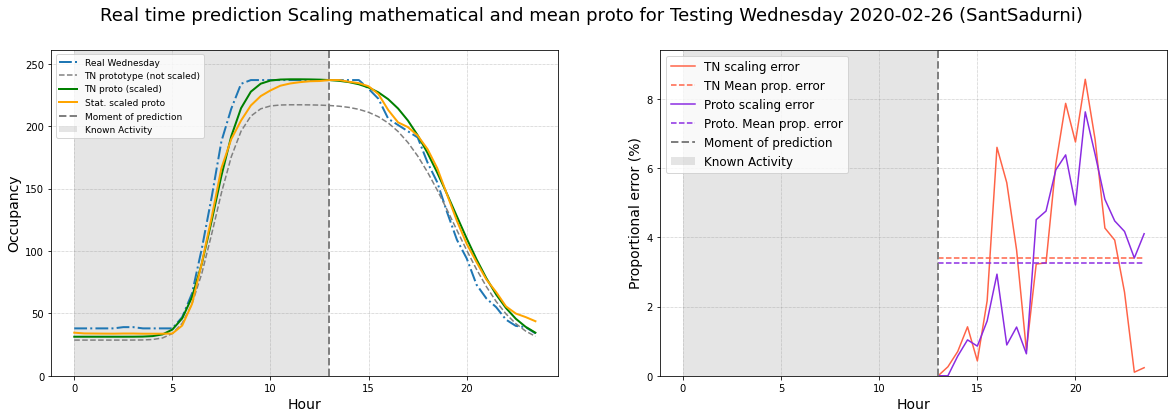

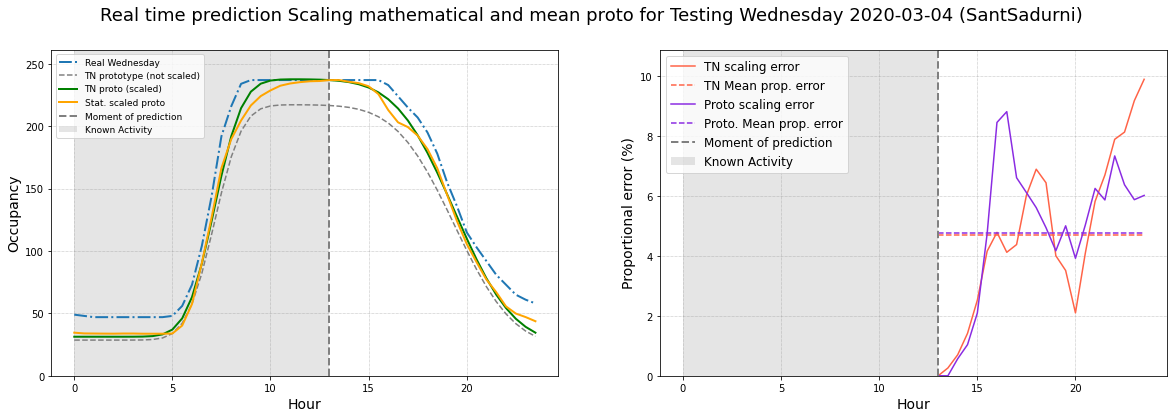

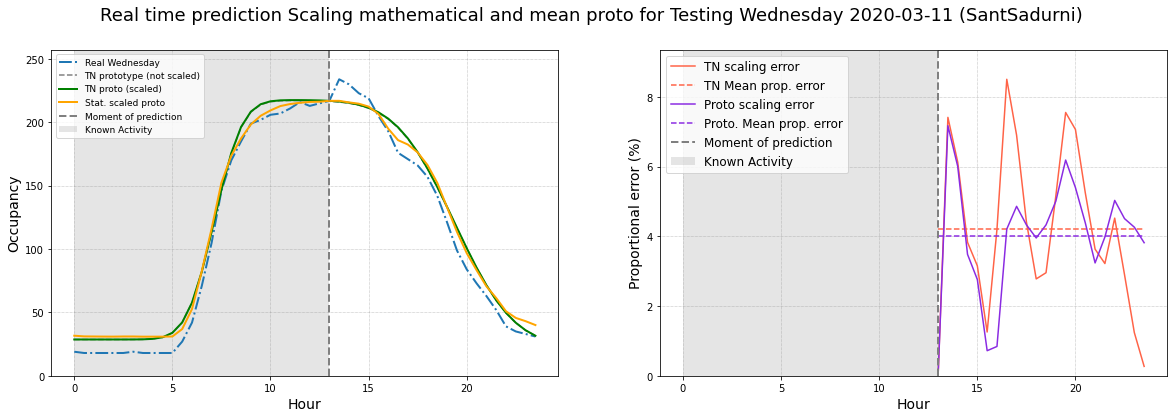

In [61]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_wednesdays
t_dates= testing_wednesdays_dates
limit_hour = 13
day = 'Wednesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0

cont=0        
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### THURSDAY

2020-02-27
Real Thursday scaled prtotype error:  2.82 %
Real Thursday scaled prtotype STDV:  2.3546444817363104
Real Thursday scaled TN error:  3.25 %
Real Thursday scaled TN STDV:  3.115617215481767
_____________________________________________________________
2020-03-05
Real Thursday scaled prtotype error:  11.21 %
Real Thursday scaled prtotype STDV:  6.280310279317844
Real Thursday scaled TN error:  11.13 %
Real Thursday scaled TN STDV:  6.6708348941653455
_____________________________________________________________
2020-03-12
Real Thursday scaled prtotype error:  12.79 %
Real Thursday scaled prtotype STDV:  7.077453468496977
Real Thursday scaled TN error:  12.85 %
Real Thursday scaled TN STDV:  7.3376640755579015
_____________________________________________________________


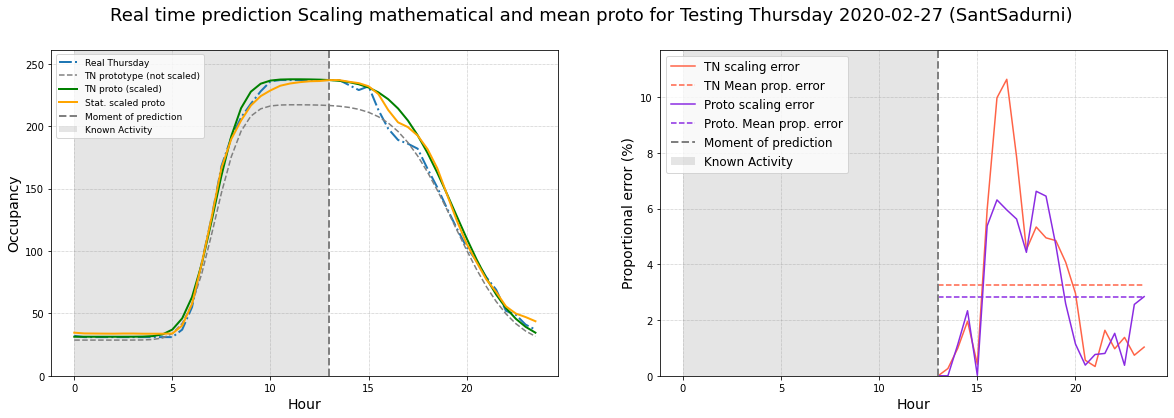

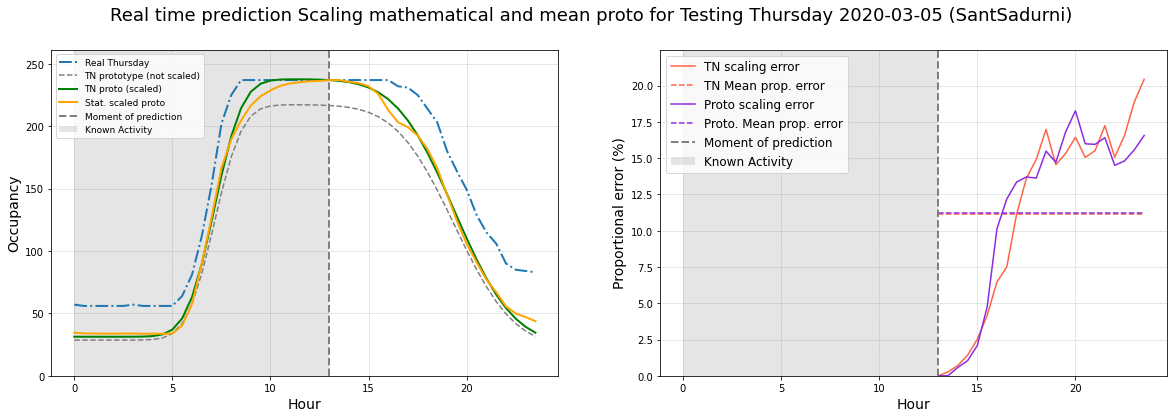

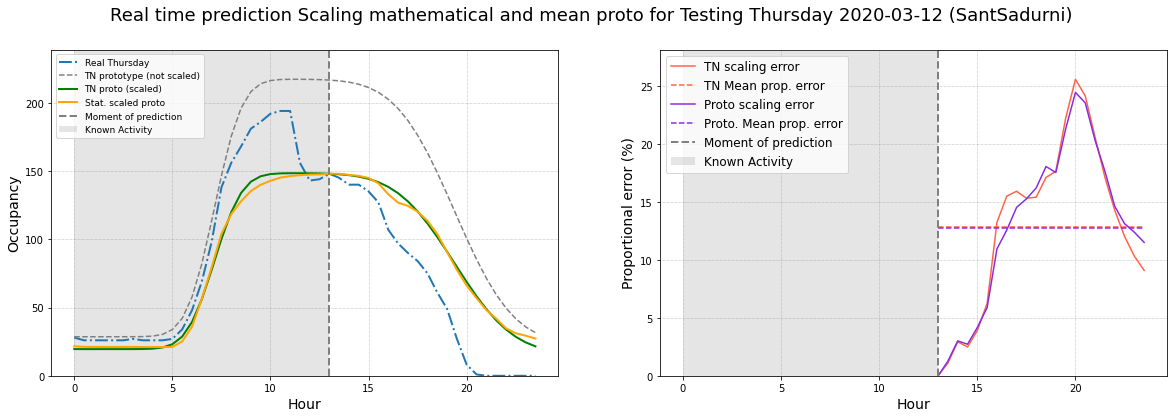

In [62]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_thursdays
t_dates= testing_thursdays_dates
limit_hour = 13
day = 'Thursday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1
    

### FRIDAY

2020-02-28
Real Friday scaled prtotype error:  1.69 %
Real Friday scaled prtotype STDV:  1.4836834323805657
Real Friday scaled TN error:  2.19 %
Real Friday scaled TN STDV:  1.215462765116084
_____________________________________________________________
2020-03-06
Real Friday scaled prtotype error:  5.47 %
Real Friday scaled prtotype STDV:  2.043725121452018
Real Friday scaled TN error:  5.1 %
Real Friday scaled TN STDV:  2.7202378009597563
_____________________________________________________________
2020-03-13
Real Friday scaled prtotype error:  1.81 %
Real Friday scaled prtotype STDV:  1.1353661935042212
Real Friday scaled TN error:  2.07 %
Real Friday scaled TN STDV:  1.133745745876706
_____________________________________________________________


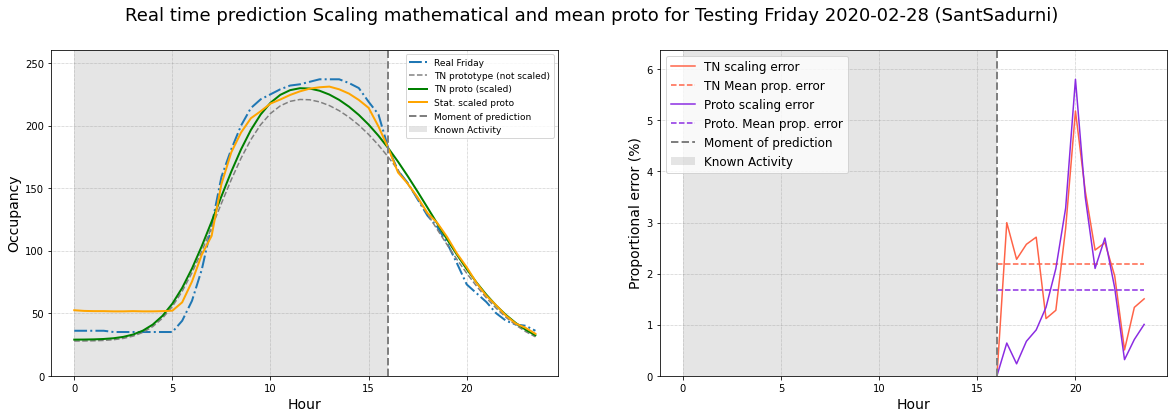

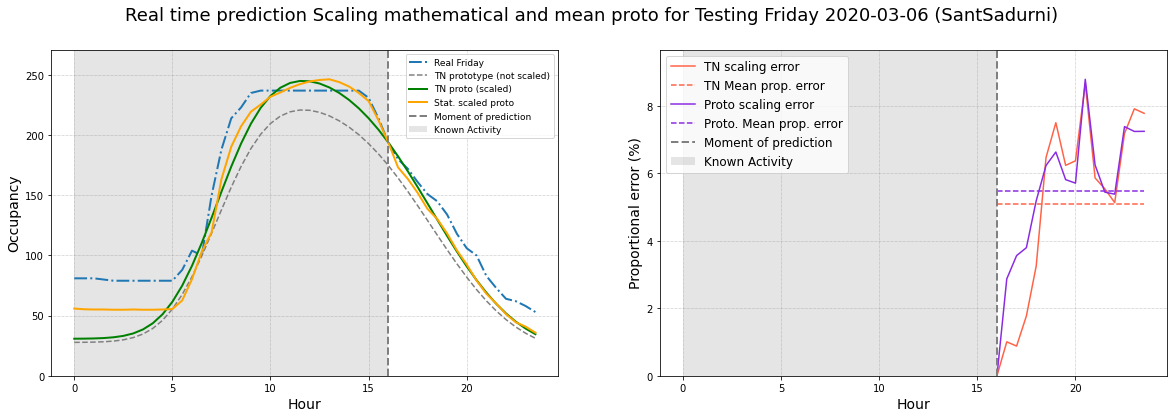

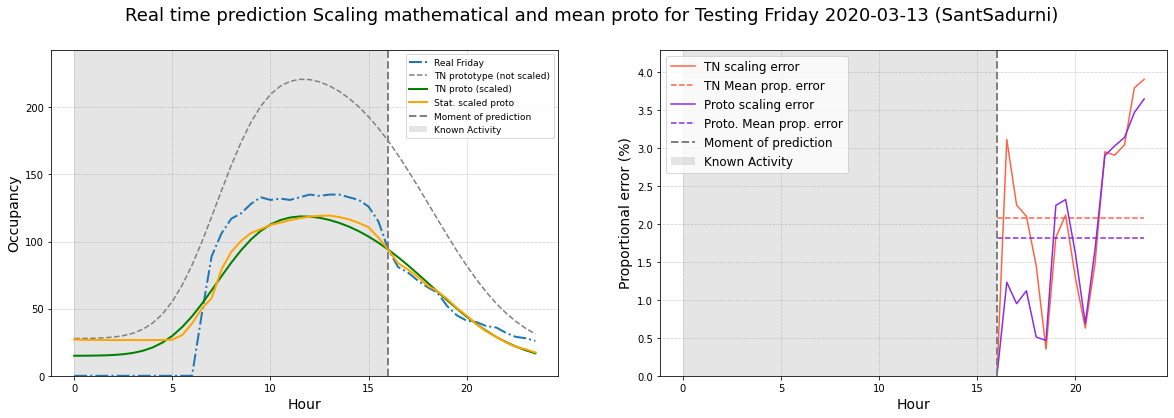

In [63]:
statistic_proto = hist_friday_proto
tn_proto = tn_friday
t_days = testing_fridays
t_dates=testing_fridays_dates
limit_hour = 16
day = 'Friday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
  
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1
    

### WEEKEND

### SATURDAY

2020-02-29
Real Saturday scaled prtotype error:  1.66 %
Real Saturday scaled prtotype STDV:  1.116172753766048
Real Saturday scaled TN error:  1.79 %
Real Saturday scaled TN STDV:  0.9735459406038319
_____________________________________________________________
2020-03-07
Real Saturday scaled prtotype error:  5.12 %
Real Saturday scaled prtotype STDV:  3.7917346754652836
Real Saturday scaled TN error:  6.13 %
Real Saturday scaled TN STDV:  3.41651948834579
_____________________________________________________________
2020-03-14
Real Saturday scaled prtotype error:  2.1 %
Real Saturday scaled prtotype STDV:  1.9202400131581738
Real Saturday scaled TN error:  2.17 %
Real Saturday scaled TN STDV:  1.8597506790949023
_____________________________________________________________


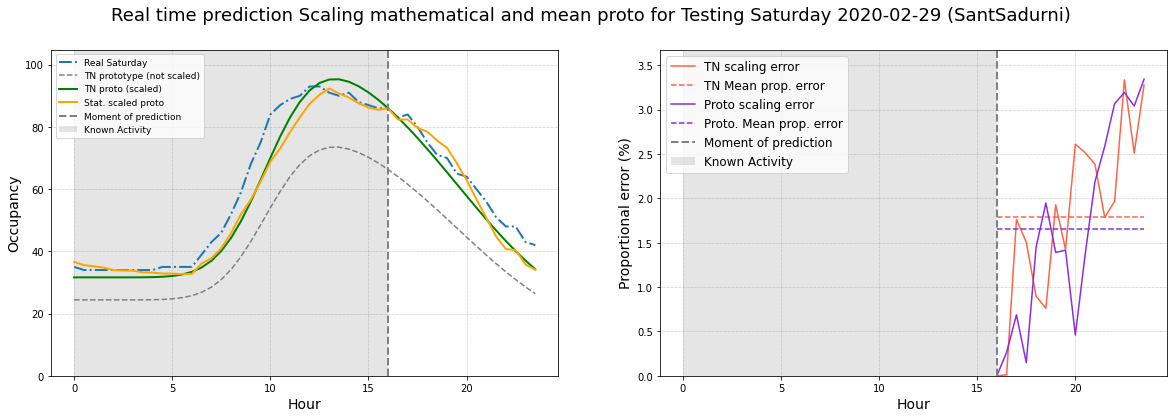

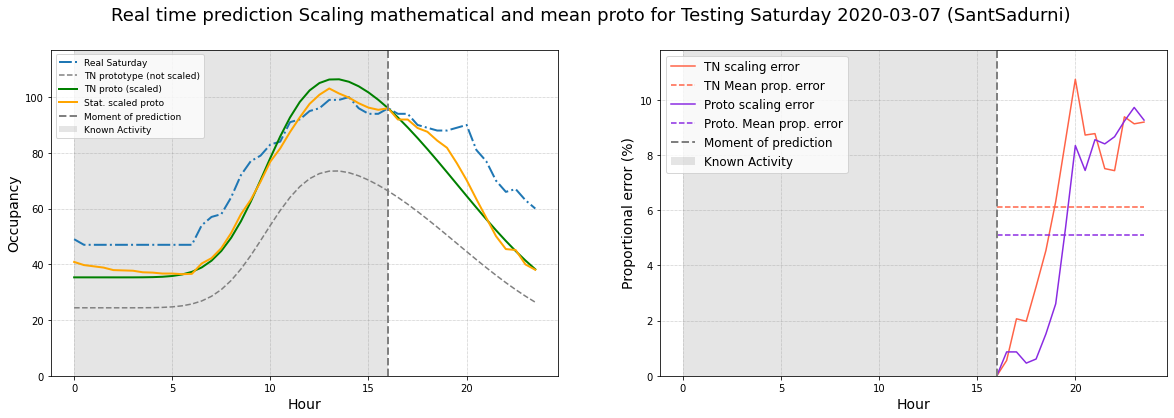

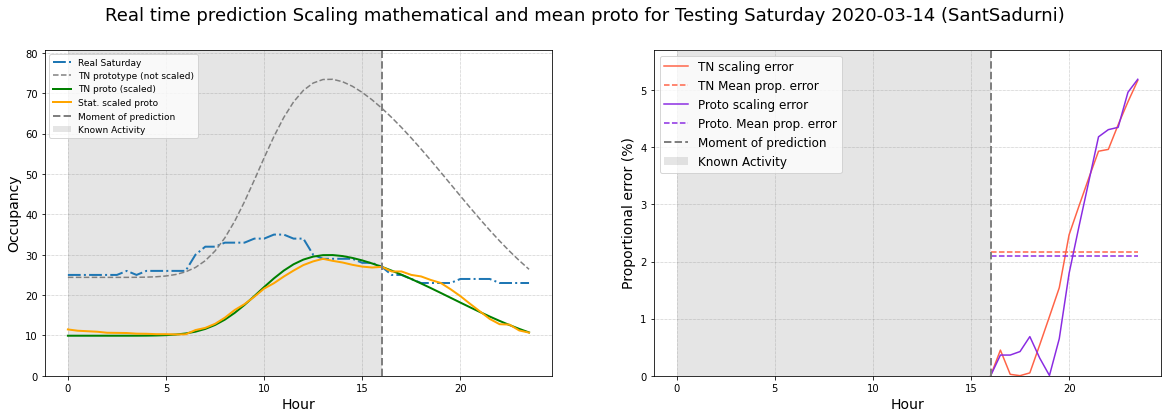

In [64]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_saturdays
t_dates= testing_saturdays_dates
limit_hour = 16
day = 'Saturday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### SUNDAY

2020-03-01
Real Sunday scaled prtotype error:  0.87 %
Real Sunday scaled prtotype STDV:  0.6306421227719603
Real Sunday scaled TN error:  0.98 %
Real Sunday scaled TN STDV:  0.673502749698627
_____________________________________________________________
2020-03-08
Real Sunday scaled prtotype error:  4.01 %
Real Sunday scaled prtotype STDV:  2.1598869208247513
Real Sunday scaled TN error:  5.12 %
Real Sunday scaled TN STDV:  2.812021182971882
_____________________________________________________________
2020-03-15
Real Sunday scaled prtotype error:  2.21 %
Real Sunday scaled prtotype STDV:  2.0864827006040283
Real Sunday scaled TN error:  2.51 %
Real Sunday scaled TN STDV:  2.0674056249992234
_____________________________________________________________


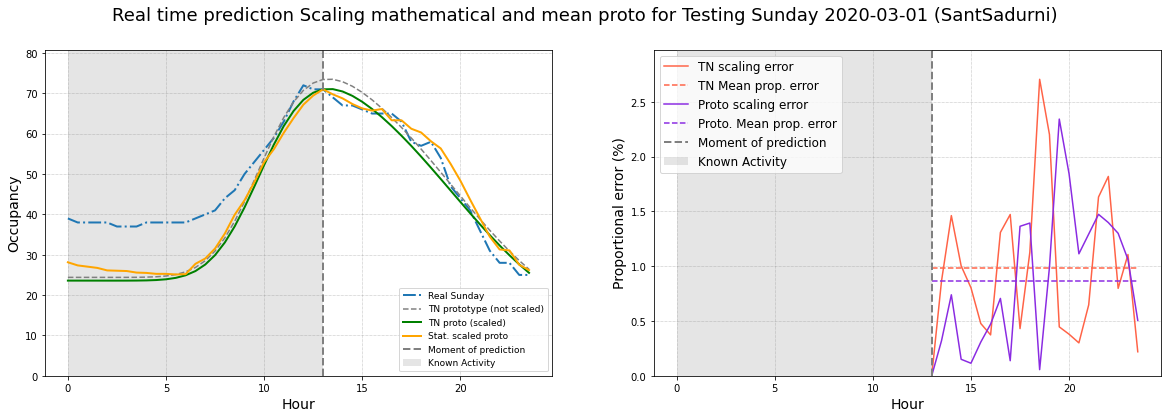

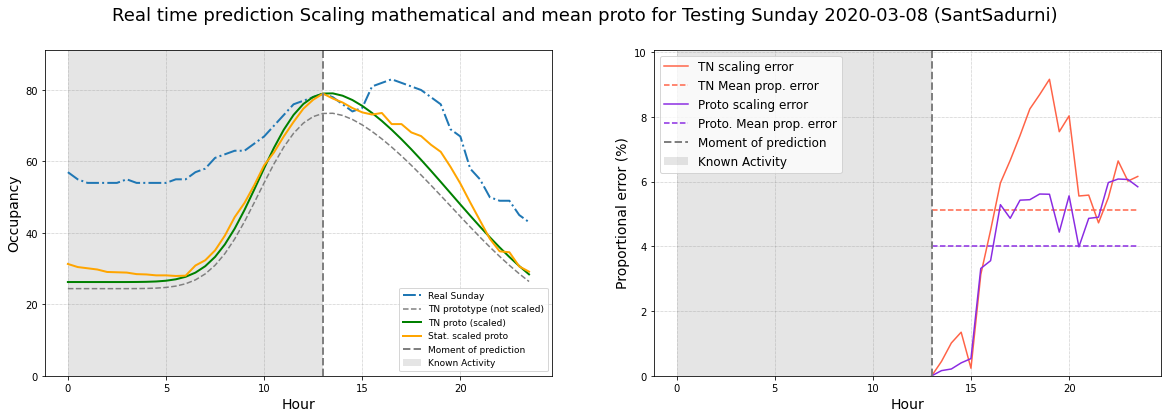

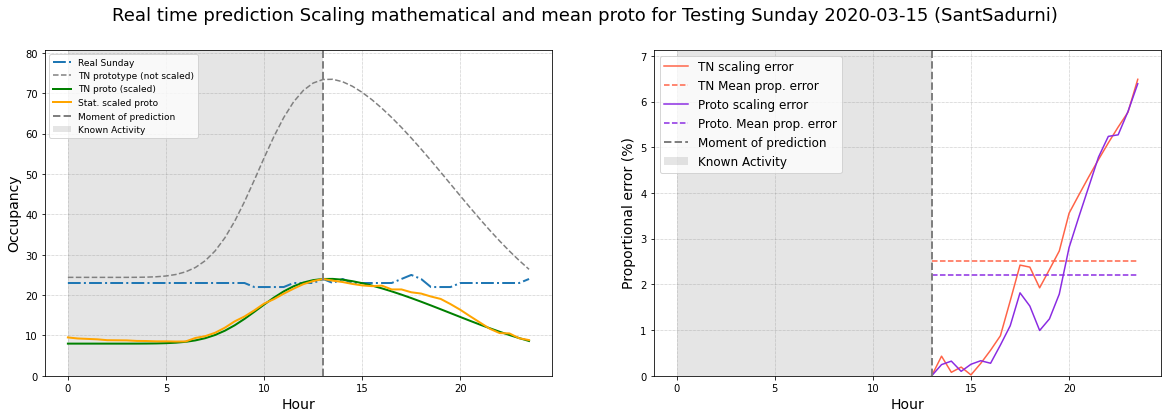

In [65]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_sundays
t_dates= testing_sundays_dates
limit_hour = 13
day = 'Sunday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
    
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

# Store protos, params, areas and offsets

In [66]:
# df_prototypes = pd.read_csv('data/prototypes_new.csv')
# index = 0

# weekday_tn_params = ','.join(str(e) for e in list(res_weekday.x))
# friday_tn_params  = ','.join(str(e) for e in list(res_friday.x))
# weekend_tn_params = ','.join(str(e) for e in list(res_weekend.x))

# weekday_mean_area = weekday_area
# friday_mean_area  = friday_area
# weekend_mean_area = weekend_area

# weekday_mean_offset = weekday_offset
# friday_mean_offset  = friday_offset
# weekend_mean_offset = weekend_offset

# total_wave_weekday_s = ','.join(str(e) for e in tn_weekday.tolist())
# total_wave_weekend_s = ','.join(str(e) for e in tn1_weekend.tolist())
# total_wave_friday_s  = ','.join(str(e) for e in tn_friday.tolist())

# historical_weekday_s = ','.join(str(e) for e in hist_weekday_proto.tolist())
# historical_weekend_s = ','.join(str(e) for e in hist_weekend_proto.tolist())
# historical_friday_s  = ','.join(str(e) for e in hist_friday_proto.tolist())


# df_prototypes.at[index,'CDF subtraction_weekday_proto'] = total_wave_weekday_s
# df_prototypes.at[index,'CDF subtraction_friday_proto']  = total_wave_friday_s
# df_prototypes.at[index,'CDF subtraction_weekend_proto'] = total_wave_weekend_s

# df_prototypes.at[index,'CDF subtraction_weekday_params'] = weekday_tn_params
# df_prototypes.at[index,'CDF subtraction_friday_params']  = friday_tn_params
# df_prototypes.at[index,'CDF subtraction_weekend_params'] = weekend_tn_params

# df_prototypes.at[index,'CDF subtraction_weekday_area'] = weekday_mean_area
# df_prototypes.at[index,'CDF subtraction_friday_area']  = friday_mean_area
# df_prototypes.at[index,'CDF subtraction_weekend_area'] = weekend_mean_area

# df_prototypes.at[index,'CDF subtraction_weekday_offset'] = weekday_mean_offset
# df_prototypes.at[index,'CDF subtraction_friday_offset']  = friday_mean_offset
# df_prototypes.at[index,'CDF subtraction_weekend_offset'] = weekend_mean_offset

# df_prototypes.at[index,'Historical_weekday_proto'] = historical_weekday_s
# df_prototypes.at[index,'Historical_weekend_proto'] = historical_weekend_s
# df_prototypes.at[index,'Historical_friday_proto']  = historical_friday_s

# df_prototypes.to_csv("data/final_prototypes.csv", index=False)
# df_prototypes

In [67]:
# How to read the prorotypes: 
# string = exportable_df.at[0,'CDF subtraction_weekday_proto']
# list_of_strings = string.split(',')
# final_list = list(np.float_(list_of_strings))

In [68]:
# import pandas as pd
# df_prototypes_2 = pd.read_csv('data/prototypes_new.csv')
# new_row = {'Location':'Cerdanyola'}
# #append row to the dataframe
# df_prototypes_2 = df_prototypes_2.append(new_row, ignore_index=True)
# df_prototypes_2

In [69]:
# df_prototypes_2.to_csv("data/prototypes_new.csv", index=False)
# day = 'Monday'
# date = '2020-02-24'
# real_day = mean_of_day(day,date)
# real_day.values

In [70]:
# hist_friday_proto.tolist()